In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.1307,), (0.3081,))])

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=1000,
                                         shuffle=False, num_workers=2)

In [24]:
# functions to show an image
def imshow(img):
#     img = img + 0./ 2 + 0.5     # unnormalize
    img = img*0.3081+ 0.1307
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

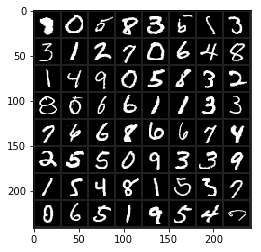

In [26]:
# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()
# show images
grid = torchvision.utils.make_grid(images)
imshow(grid)

In [6]:
class classifier_mnist(nn.Module):
    def __init__(self):
        super(classifier_mnist, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 48, 5)
        self.fc1 = nn.Linear(48*16, 100)
        self.fc2 = nn.Linear(100, 100)
        self.fc3 = nn.Linear(100, 10)
#         self.soft= nn.Softmax()

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 48 * 16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
#         x = self.soft(self.fc3(x))
        return x
net = classifier_mnist()

In [7]:
is_gpu = True

In [8]:
if is_gpu:
    net.cuda()

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5)

In [10]:
epochs  = 6
for epoch in range(epochs):  # loop over the dataset multiple times
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader):
        # get the inputs
        inputs, labels = data
        if is_gpu:
            inputs, labels = inputs.cuda(), labels.cuda()


        # wrap them in Variable
        inputs, labels = Variable(inputs), Variable(labels)
        

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

[1,    20] loss: 0.023
[1,    40] loss: 0.023
[1,    60] loss: 0.022
[1,    80] loss: 0.021
[1,   100] loss: 0.018
[1,   120] loss: 0.014
[1,   140] loss: 0.009
[1,   160] loss: 0.008
[1,   180] loss: 0.007
[1,   200] loss: 0.006
[1,   220] loss: 0.006
[1,   240] loss: 0.004
[1,   260] loss: 0.004
[1,   280] loss: 0.004
[1,   300] loss: 0.004
[1,   320] loss: 0.004
[1,   340] loss: 0.003
[1,   360] loss: 0.003
[1,   380] loss: 0.003
[1,   400] loss: 0.002
[1,   420] loss: 0.002
[1,   440] loss: 0.002
[1,   460] loss: 0.002
[1,   480] loss: 0.002
[1,   500] loss: 0.002
[1,   520] loss: 0.002
[1,   540] loss: 0.002
[1,   560] loss: 0.002
[1,   580] loss: 0.002
[1,   600] loss: 0.002
[1,   620] loss: 0.002
[1,   640] loss: 0.002
[1,   660] loss: 0.002
[1,   680] loss: 0.002
[1,   700] loss: 0.002
[1,   720] loss: 0.002
[1,   740] loss: 0.002
[1,   760] loss: 0.002
[1,   780] loss: 0.002
[1,   800] loss: 0.002
[1,   820] loss: 0.001
[1,   840] loss: 0.001
[1,   860] loss: 0.001
[1,   880] 

In [11]:
correct = 0
total = 0
for data in testloader:
    images, labels = data
    if is_gpu:
        images,labels = images.cuda(),labels.cuda()
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    (100.0 * correct) / total))

Accuracy of the network on the 10000 test images: 98 %


In [12]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
for data in testloader:
    images, labels = data
    if is_gpu:
        images,labels = images.cuda(),labels.cuda()
    outputs = net(Variable(images))
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted == labels).squeeze()
    for i in range(1000):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        i, 100 * class_correct[i] / class_total[i]))

Accuracy of     0 : 98 %
Accuracy of     1 : 99 %
Accuracy of     2 : 98 %
Accuracy of     3 : 99 %
Accuracy of     4 : 98 %
Accuracy of     5 : 98 %
Accuracy of     6 : 98 %
Accuracy of     7 : 98 %
Accuracy of     8 : 98 %
Accuracy of     9 : 97 %
